<a href="https://colab.research.google.com/github/DM2003/DEEP-LEARNING-PROJECTS/blob/main/PAMAP_2_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O pamap2.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
!unzip pamap2.zip

--2024-07-20 17:05:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘pamap2.zip’

pamap2.zip              [            <=>     ] 656.29M  4.85MB/s    in 2m 21s  

2024-07-20 17:07:46 (4.66 MB/s) - ‘pamap2.zip’ saved [688167640]

Archive:  pamap2.zip
  inflating: PAMAP2_Dataset/Protocol/subject101.dat  
  inflating: PAMAP2_Dataset/Protocol/subject102.dat  
  inflating: PAMAP2_Dataset/Protocol/subject103.dat  
  inflating: PAMAP2_Dataset/Protocol/subject104.dat  
  inflating: PAMAP2_Dataset/Protocol/subject105.dat  
  inflating: PAMAP2_Dataset/Protocol/subject106.dat  
  inflating: PAMAP2_Dataset/Protocol/subject107.dat  
  inflating: PAMAP2_Dataset/Protocol/subject108.dat  
  inflating: PAMAP2_Dataset/Protocol/sub

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout

In [3]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [4]:
def generate_three_IMU(name):
    x = name + '_x'
    y = name + '_y'
    z = name + '_z'
    return [x, y, z]

def generate_four_IMU(name):
    x = name + '_x'
    y = name + '_y'
    z = name + '_z'
    w = name + '_w'
    return [x, y, z, w]

def generate_cols_IMU(name):
    # temp
    temp = name + '_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name + '_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name + '_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name + '_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name + '_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # orientation
    orientation = name + '_4D_orientation'
    orientation = generate_four_IMU(orientation)
    output.extend(orientation)
    return output

def load_IMU():
    output = ['time_stamp', 'activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output

def load_subjects(root='/content/PAMAP2_Dataset/Protocol/subject'):
    all_subjects = []
    cols = load_IMU()

    for i in range(101, 110):
        path = root + str(i) + '.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols
        subject['id'] = i
        all_subjects.append(subject)

    output = pd.concat(all_subjects, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [5]:
data.head(5)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [6]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    # fill all the NaN values in a coulmn with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

data = fix_data(data)

In [7]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


In [8]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Size of the data:  106857960
Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  12


In [9]:
data.isnull().sum()

time_stamp                    0
activity_id                   0
heart_rate                    0
hand_temperature              0
hand_3D_acceleration_16_x     0
hand_3D_acceleration_16_y     0
hand_3D_acceleration_16_z     0
hand_3D_acceleration_6_x      0
hand_3D_acceleration_6_y      0
hand_3D_acceleration_6_z      0
hand_3D_gyroscope_x           0
hand_3D_gyroscope_y           0
hand_3D_gyroscope_z           0
hand_3D_magnetometer_x        0
hand_3D_magnetometer_y        0
hand_3D_magnetometer_z        0
hand_4D_orientation_x         0
hand_4D_orientation_y         0
hand_4D_orientation_z         0
hand_4D_orientation_w         0
chest_temperature             0
chest_3D_acceleration_16_x    0
chest_3D_acceleration_16_y    0
chest_3D_acceleration_16_z    0
chest_3D_acceleration_6_x     0
chest_3D_acceleration_6_y     0
chest_3D_acceleration_6_z     0
chest_3D_gyroscope_x          0
chest_3D_gyroscope_y          0
chest_3D_gyroscope_z          0
chest_3D_magnetometer_x       0
chest_3D

In [10]:
# Checking if there are equal no of samples for each subjects
def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize)
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

<ipython-input-10-b7bc73416aaf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


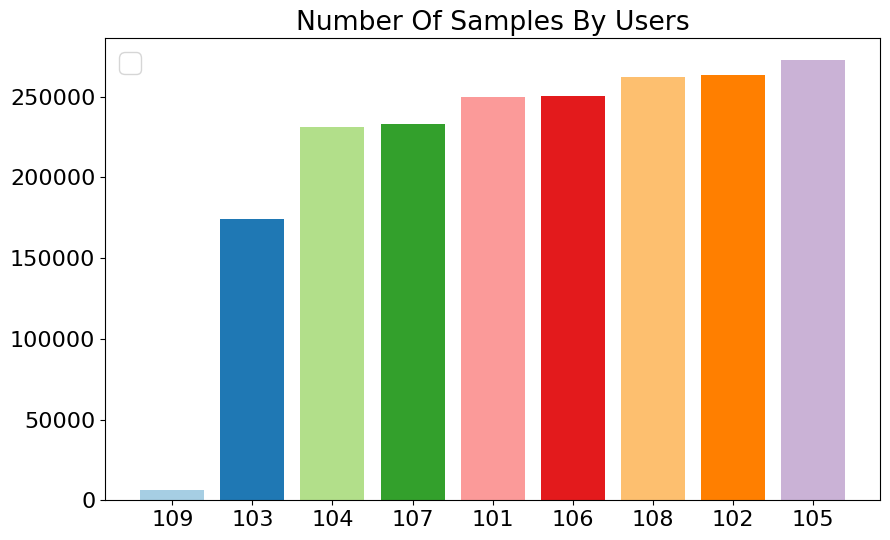

In [11]:
sampels = data.groupby(['id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['id'] = sampels['id']
sampels_to_subject['sampels'] = sampels['time_stamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
pd_fast_plot(sampels_to_subject,'sampels','id','Number Of Samples By Users')

Subject 109 as less sampels then all others subjects.



<ipython-input-10-b7bc73416aaf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


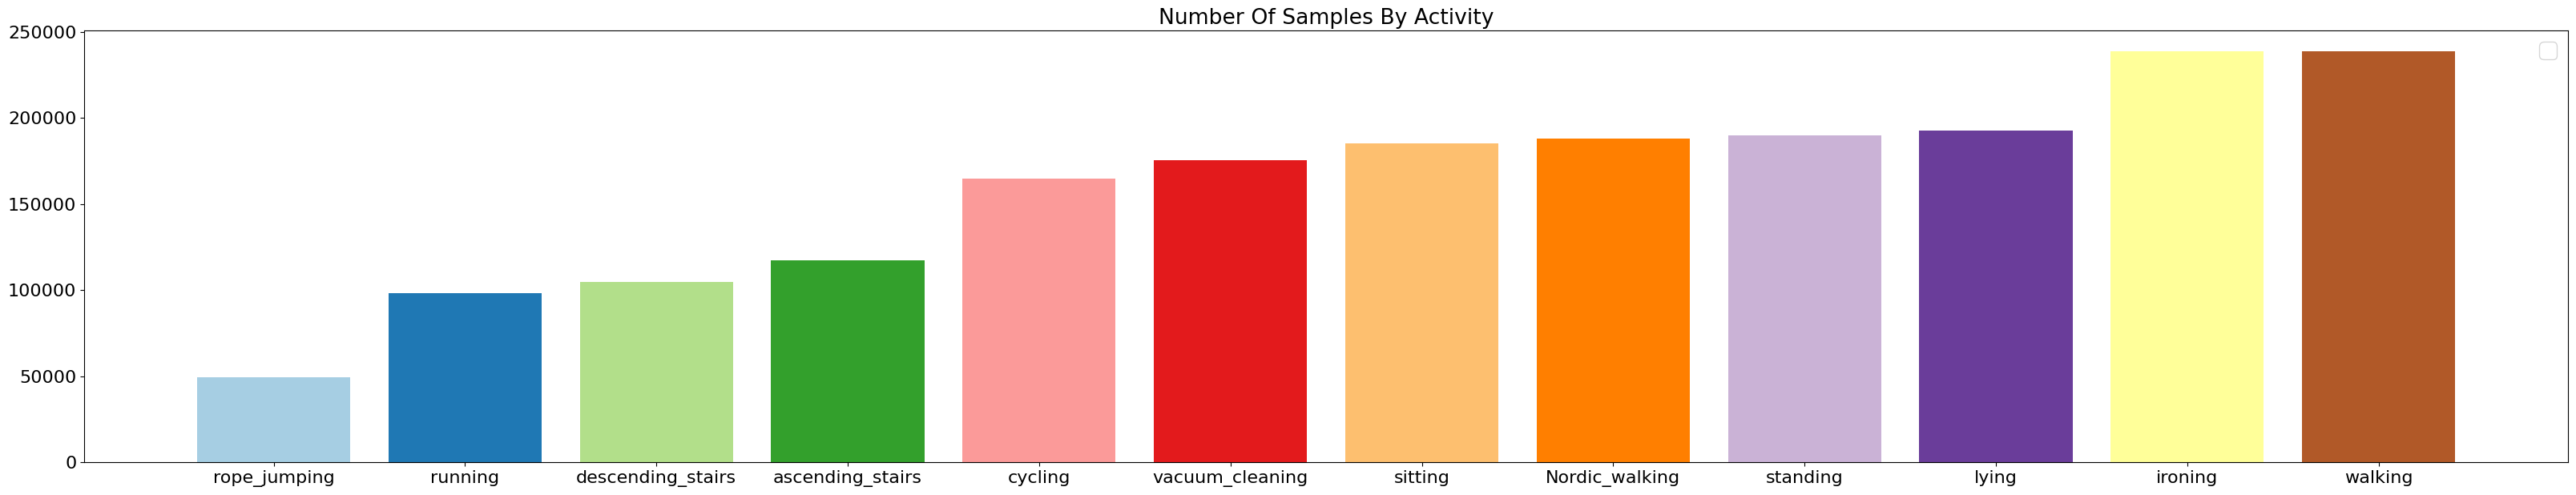

In [12]:
# Checking no of samples by activity
map_ac = load_activity_map()
sampels = data.groupby(['activity_id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [map_ac[x] for x in sampels['activity_id']]
sampels_to_subject['sampels'] = sampels['time_stamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
pd_fast_plot(sampels_to_subject,'sampels','activity','Number Of Samples By Activity',figsize=(40,7))

Rope_jumping activity as less sampels then other activities

<ipython-input-13-18e8d4bafbd7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


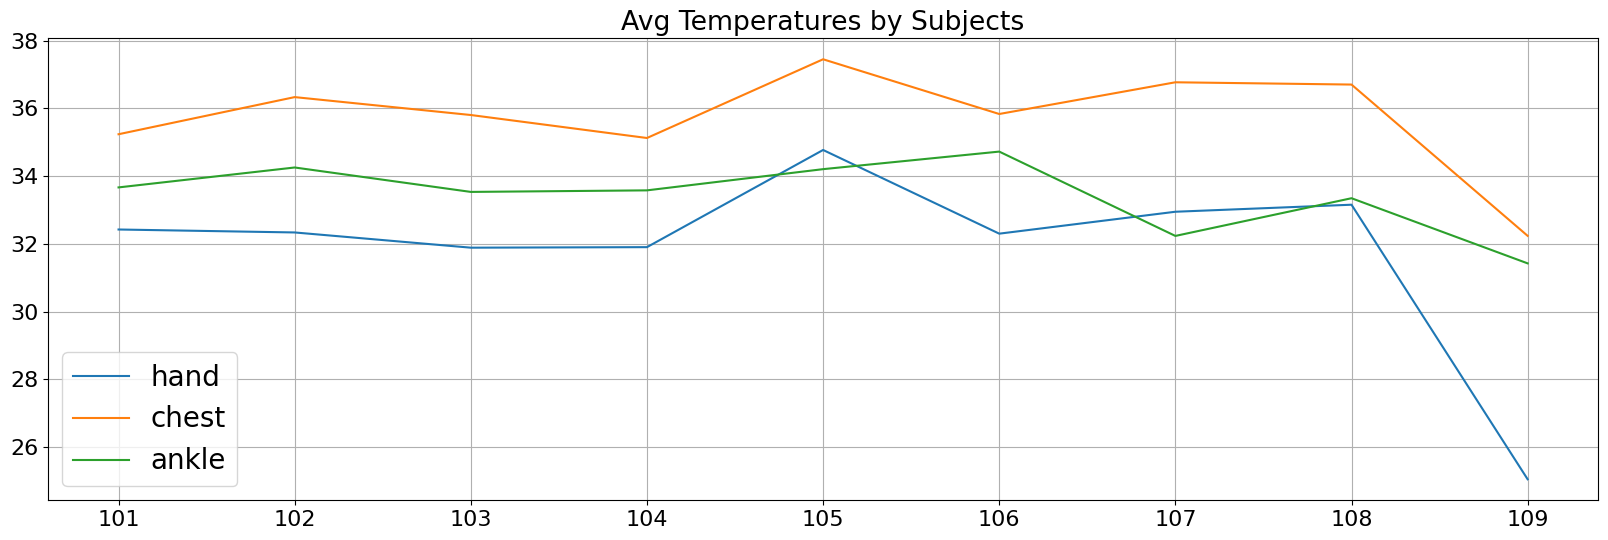

In [13]:
# Average temperatures by subjects
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = result_id['hand_temperature']
samepls_tempreture['chest'] = result_id['chest_temperature']
samepls_tempreture['ankle'] = result_id['ankle_temperature']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Temperatures by Subjects', grid = True)
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

Subject 109 has lowest temperatures in all parts of the human body

<ipython-input-14-e157bcac22dd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


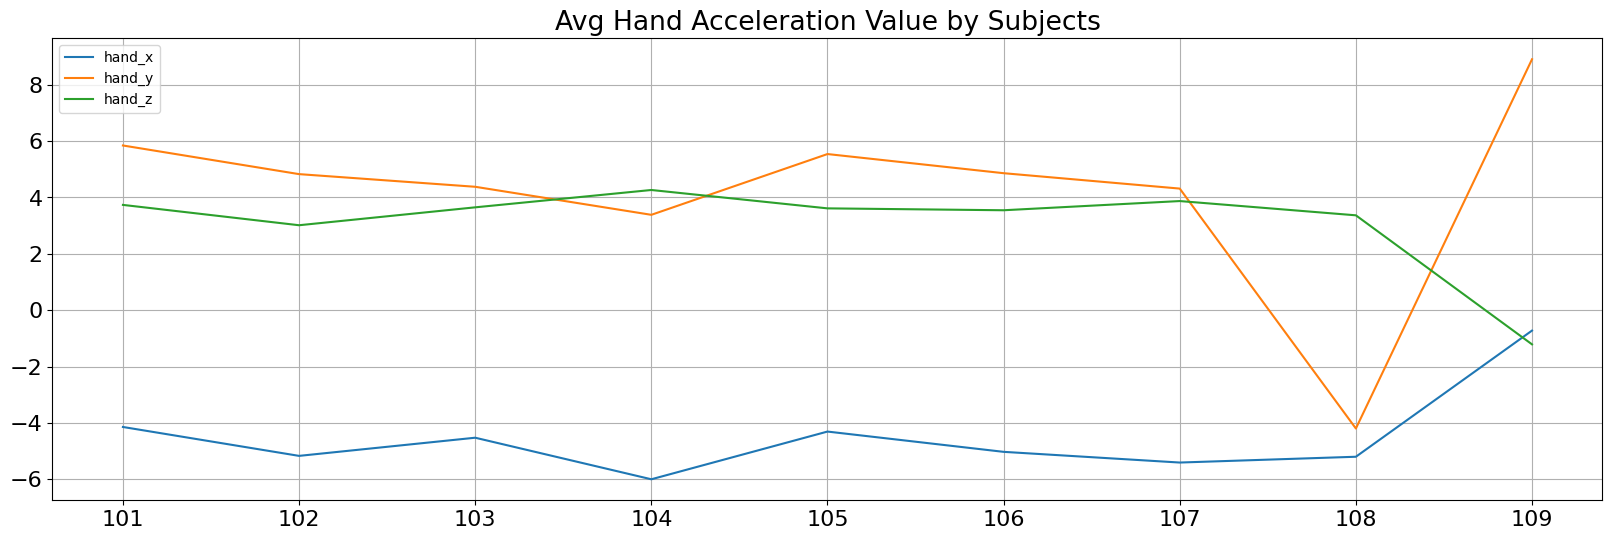

In [14]:
# Average Hand Accleration value by Subjects
samepls = pd.DataFrame()
samepls['hand_x'] = result_id['hand_3D_acceleration_16_x']
samepls['hand_y'] = result_id['hand_3D_acceleration_16_y']
samepls['hand_z'] = result_id['hand_3D_acceleration_16_z']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Hand Acceleration Value by Subjects', grid = True)
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 10)
c = ax.set_xticks(np.arange(len(samepls)))

In [15]:
from keras.layers import LSTM, GRU, Dropout
from keras.layers import Dense
import sys
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942872 entries, 2928 to 2872019
Data columns (total 55 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time_stamp                  float64
 1   activity_id                 int64  
 2   heart_rate                  float64
 3   hand_temperature            float64
 4   hand_3D_acceleration_16_x   float64
 5   hand_3D_acceleration_16_y   float64
 6   hand_3D_acceleration_16_z   float64
 7   hand_3D_acceleration_6_x    float64
 8   hand_3D_acceleration_6_y    float64
 9   hand_3D_acceleration_6_z    float64
 10  hand_3D_gyroscope_x         float64
 11  hand_3D_gyroscope_y         float64
 12  hand_3D_gyroscope_z         float64
 13  hand_3D_magnetometer_x      float64
 14  hand_3D_magnetometer_y      float64
 15  hand_3D_magnetometer_z      float64
 16  hand_4D_orientation_x       float64
 17  hand_4D_orientation_y       float64
 18  hand_4D_orientation_z       float64
 19  hand_4D_orientation_w  

In [17]:
# GETTING  TARGETS ATTRIBUTE
target = data["activity_id"]

data.drop(["activity_id"],axis = 1,inplace = True)
target

2928        1
2929        1
2930        1
2931        1
2932        1
           ..
2872015    24
2872016    24
2872017    24
2872018    24
2872019    24
Name: activity_id, Length: 1942872, dtype: int64

In [18]:
target.value_counts()

activity_id
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64

In [19]:
# dropping timestamp
data.drop(['time_stamp'],axis = 1, inplace = True)
data

,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2928,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1.000000,0.000000,0.000000,0.000000,101
2929,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1.000000,0.000000,0.000000,0.000000,101
2930,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1.000000,0.000000,0.000000,0.000000,101
2931,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1.000000,0.000000,0.000000,0.000000,101
2932,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,162.000000,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,109
2872016,162.000000,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,109
2872017,162.000000,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,109
2872018,162.000000,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,109


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=9)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1457154, 53)
(485718, 53)
(1457154,)
(485718,)


In [21]:
# SCALING TO SETTING ALL ATTRIBUTES UNITS SIMILAR
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling
scaler = RobustScaler()


# x_train.iloc[:,1:] = scaler.fit_transform(x_train.iloc[:,1:])
# x_test.iloc[:,1:] = scaler.transform(x_test.iloc[:,1:])

x_train.iloc[:,0:] = scaler.fit_transform(x_train.iloc[:,0:])
x_test.iloc[:,0:] = scaler.transform(x_test.iloc[:,0:])

print(x_train.head(10))

         heart_rate  hand_temperature  hand_3D_acceleration_16_x  \
1458209   -0.590909          0.763158                   0.678558   
1134410   -0.617225         -0.052632                   0.381065   
1316008    0.145933         -0.947368                  -0.695179   
1417903   -0.366029          0.657895                   0.772429   
668300     0.461722         -0.684211                  -0.865987   
1085251    0.224880         -0.263158                   0.684964   
265474     1.066986         -0.342105                   0.970175   
1573216   -0.145933          0.815789                  -0.657509   
518133    -0.275120          0.552632                  -0.287115   
2463691   -0.380383          0.289474                   1.517620   

         hand_3D_acceleration_16_y  hand_3D_acceleration_16_z  \
1458209                   0.598202                   0.662131   
1134410                   0.182070                   0.922162   
1316008                   0.022537                   0.1

  1d CNN

In [22]:
!pip install tensorflow

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 53, 64)            256       
                                                                 
 batch_normalization (Batch  (None, 53, 64)            256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 53, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 27, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 64)            12352     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 27, 64)            0

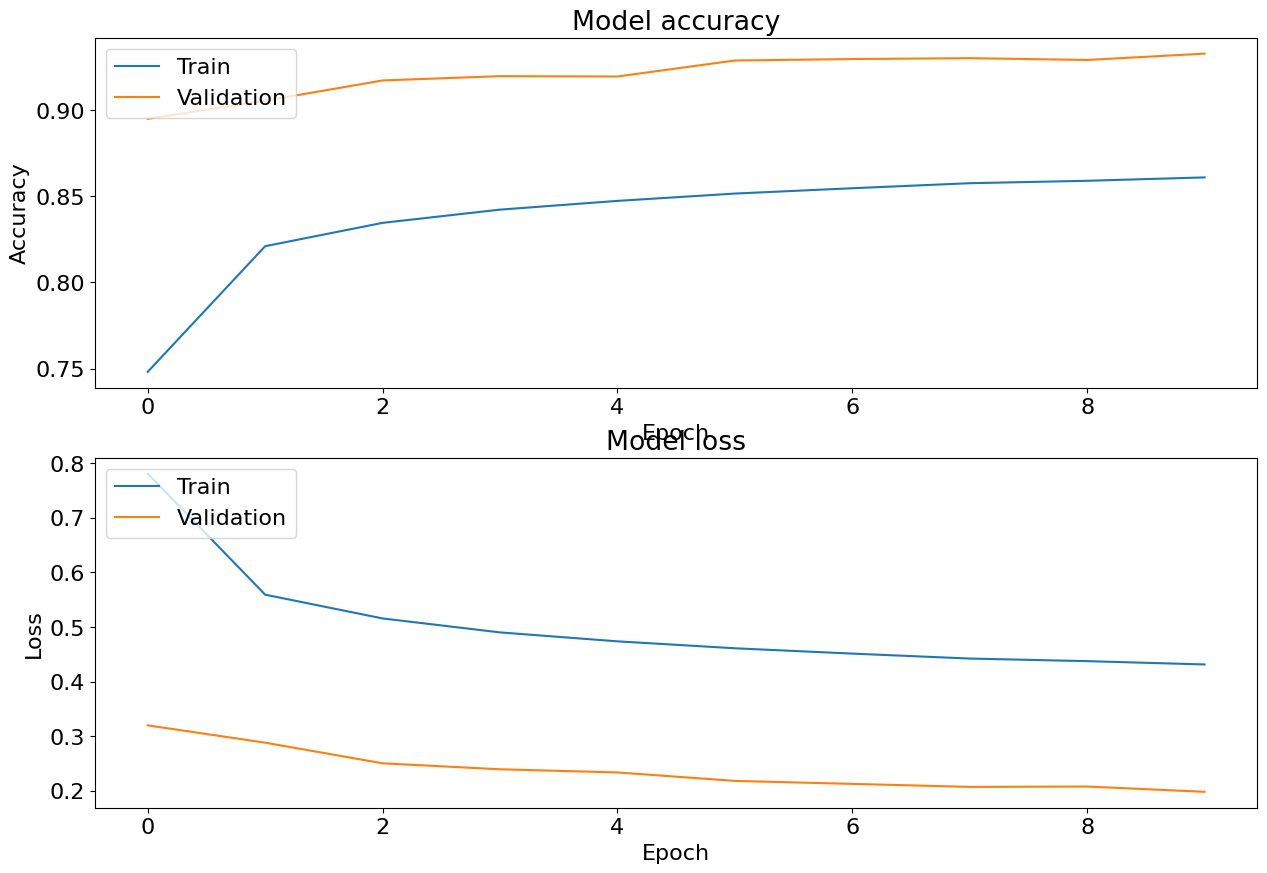

In [31]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, \
    GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Encode the labels to be in the range [0, num_classes)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

# Define the model
def cnnmodel(input_shape, num_classes):
    clear_session()  # Clear any previous models in the Keras backend
    model = Sequential()  # Initialize the Sequential model (a linear stack of layers)

    # Layer 1
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', input_shape=input_shape)) # Added padding='same' to all Conv1D and MaxPool1D layers to ensure that the output dimensions do not shrink too rapidly.
    model.add(BatchNormalization())  # A layer that normalizes the inputs to a layer for each mini-batch.
    model.add(LeakyReLU())  # A type of activation function
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))  # Adds a 1D max pooling layer.

    # Layer 2
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Dropout(0.5))  # Adds a dropout layer with a dropout rate of 0.5.

    # Layer 3
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Dropout(0.5))  # Adds a dropout layer with a dropout rate of 0.5.

    # Layer 4
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Dropout(0.5))

    # Layer 5
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())  # Adds a global average pooling layer which averages the entire sequence of features to a single value per feature map.
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))  # Changed output layer to match number of activity classes

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Changed loss function to match multiclass classification
    return model

# Define input shape
input_shape = (x_train.shape[1], 1)

# Create the model
model = cnnmodel(input_shape, num_classes)

# Print model summary
model.summary()

# Reshape input data to match Conv1D input requirements
x_train_cnn = np.expand_dims(x_train.values, axis=-1)
x_test_cnn = np.expand_dims(x_test.values, axis=-1)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train_cnn, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_cnn, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

# Plotting accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

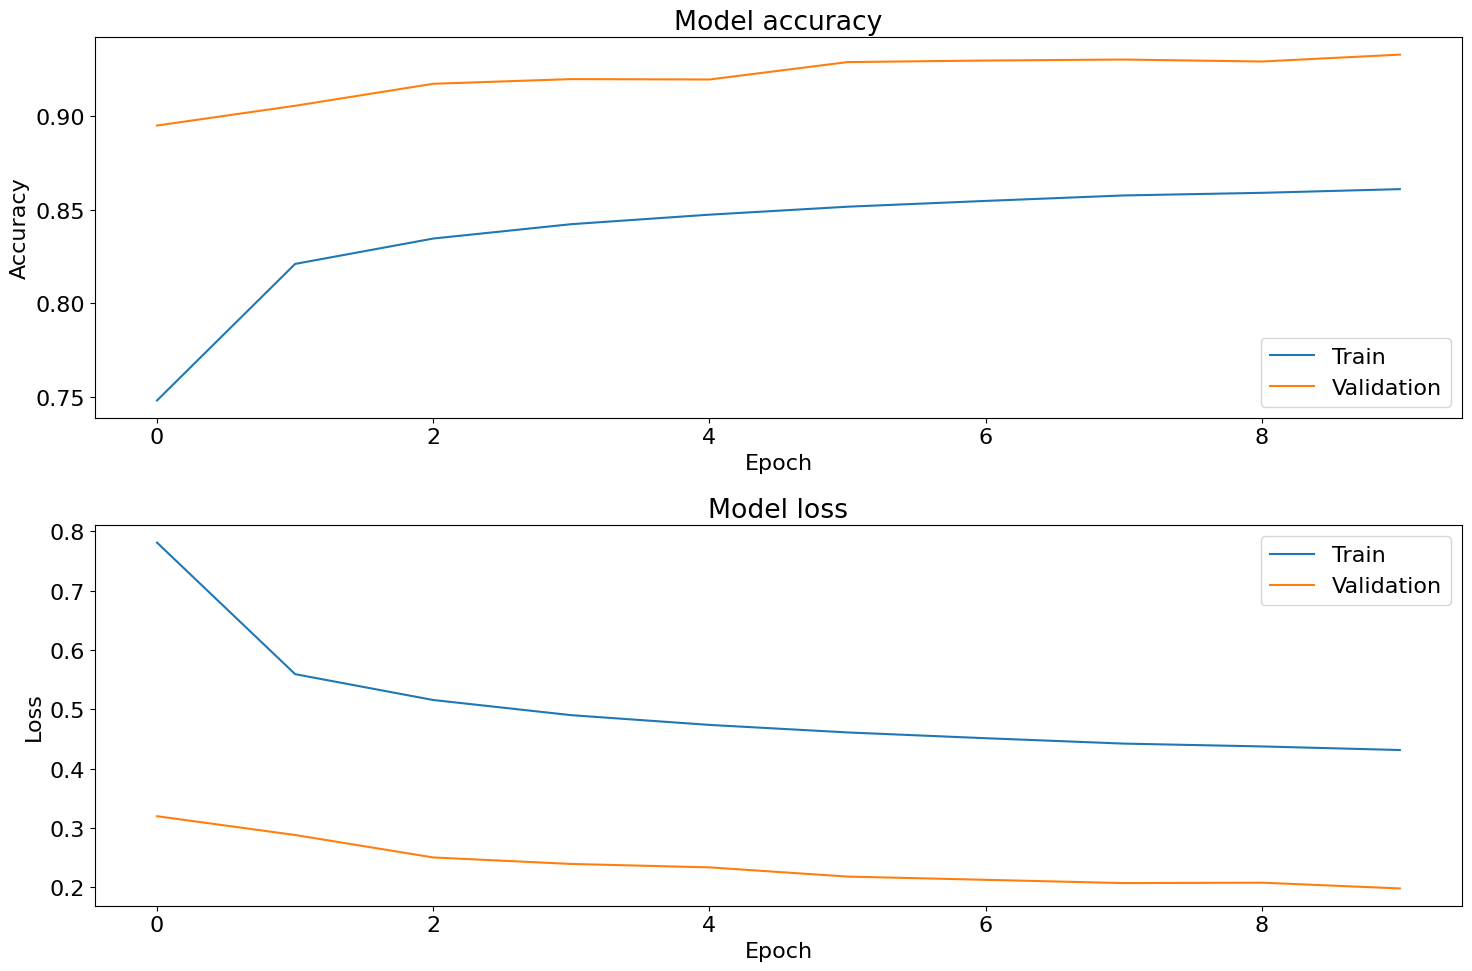

In [32]:
# Plotting accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

2D CNN

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Reshape input data for 2D CNN
x_train_2d = x_train_cnn.reshape((x_train_cnn.shape[0], x_train_cnn.shape[1], x_train_cnn.shape[2], 1))
x_test_2d = x_test_cnn.reshape((x_test_cnn.shape[0], x_test_cnn.shape[1], x_test_cnn.shape[2], 1))

# Determine the number of classes dynamically
num_classes = np.max(y_train) + 1  # Add 1 because classes start at 0

# Convert labels to categorical
y_train_2d = to_categorical(y_train, num_classes=num_classes)
y_test_2d = to_categorical(y_test, num_classes=num_classes)

def cnnmodel2D(input_shape2D, num_classes):
    model2D = Sequential()

    # Layer 1
    model2D.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape2D))
    model2D.add(LeakyReLU())
    model2D.add(AveragePooling2D(pool_size=(2, 1), strides=(2, 1)))  # Adjusted pool size and strides

    # Layer 2
    model2D.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model2D.add(LeakyReLU())
    model2D.add(AveragePooling2D(pool_size=(2, 1), strides=(2, 1)))  # Adjusted pool size and strides

    # Layer 3
    model2D.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model2D.add(LeakyReLU())
    model2D.add(AveragePooling2D(pool_size=(2, 1), strides=(2, 1)))  # Adjusted pool size and strides

    # Layer 4
    model2D.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model2D.add(LeakyReLU())
    model2D.add(AveragePooling2D(pool_size=(2, 1), strides=(2, 1)))  # Adjusted pool size and strides

    # Layer 5
    model2D.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model2D.add(LeakyReLU())
    model2D.add(AveragePooling2D(pool_size=(2, 1), strides=(2, 1)))  # Adjusted pool size and strides
    model2D.add(Dropout(0.5))

    # Flatten and Dense layers
    model2D.add(Flatten())
    model2D.add(Dense(256, activation='relu'))
    model2D.add(Dropout(0.5))
    model2D.add(Dense(num_classes, activation='softmax'))  # Adjust number of classes as needed

    # Compile model
    model2D.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model2D

# Define input shape
input_shape2D = (x_train_2d.shape[1], x_train_2d.shape[2], 1)

# Create the model
model2D = cnnmodel2D(input_shape2D, num_classes)

# Print model summary
model2D.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history2D = model2D.fit(x_train_2d, y_train_2d, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
score2D = model2D.evaluate(x_test_2d, y_test_2d, verbose=0)
print(f'Test loss: {score2D[0]} / Test accuracy: {score2D[1]}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 53, 1, 32)         320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 53, 1, 32)         0         
                                                                 
 average_pooling2d_1 (Avera  (None, 26, 1, 32)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 1, 32)         9248      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 26, 1, 32)         0         
                                                                 
 average_pooling2d_2 (Avera  (None, 13, 1, 32)         0         
 gePooling2D)                                         

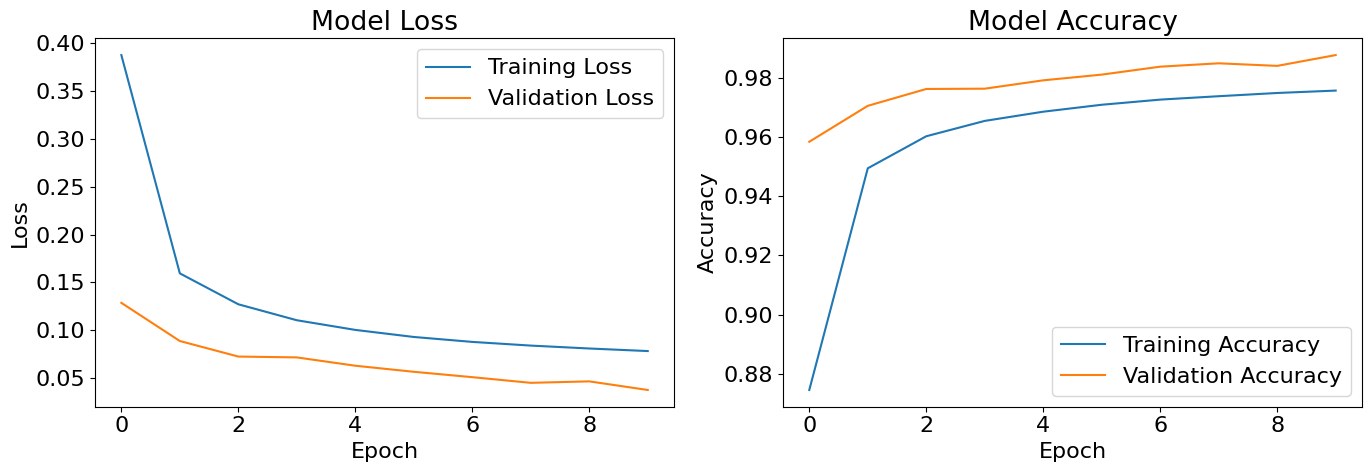

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history2D.history['loss'], label='Training Loss')
plt.plot(history2D.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history2D.history['accuracy'], label='Training Accuracy')
plt.plot(history2D.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.show()
